We noticed that the performance of the model significantly declined with the augmentation.
Therefore we are going to run perfoprmance gradient on the model trained on unaugmented data and then compare results

In [ ]:
#@title
# Import files
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from keras.utils import np_utils
from tensorflow.keras.layers import Dense,Activation, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import regularizers, optimizers
import tensorflow as tf
from tensorflow.keras.applications import ResNet50,VGG16,ResNet101, VGG19, DenseNet201, EfficientNetB4, MobileNetV2
from tensorflow.keras.applications import resnet, vgg16 , vgg19, densenet, efficientnet, mobilenet_v2
from tensorflow.keras import Model

from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, MaxPool2D, Conv2D, Flatten
from tensorflow.keras.metrics import categorical_crossentropy


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import PIL
import os
import cv2

import warnings
warnings.filterwarnings('ignore')

from keras.models import model_from_json
from keras.optimizers import SGD
from google.colab.patches import cv2_imshow

from os import listdir
from os.path import isfile, join
import numpy
import cv2

import pandas as pd
import imgaug.augmenters as iaa

# import test, train, and validation folders:
import skimage

from keras.models import model_from_json
from keras.optimizers import SGD
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
! pip install -Uq kaggle
! pip install -Uq fastai==2.2.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.2/191.2 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 91.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.8/776.8 MB 2.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.15.1 requires torch==2.0.0, but you have torch 1.7.1 which is incompatible.
torchdata 0.6.0 requires torch==2.0.0, but you have torch 1.7.1 which is incompatible.
torchaudio 2.0.1+cu118 requires torch==2.0.0, but you have torch 1.7.1 which is incompatible.


In [ ]:
from google.colab import files 
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shreyashukla01","key":"b0652e31cce9e0350fd087c244990d74"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d mohamedhanyyy/chest-ctscan-images

 98% 116M/119M [00:01<00:00, 153MB/s] 
100% 119M/119M [00:01<00:00, 110MB/s]


In [ ]:
! unzip -qq chest-ctscan-images.zip

In [ ]:
# Load VGG model from json

#Load the Model from Json File
json_file = open('/content/gdrive/My Drive/SML_Project/model_vgg16.json', 'r')
model_json_c = json_file.read()
json_file.close()
model = model_from_json(model_json_c)
#Load the weights
model.load_weights("/content/gdrive/My Drive/SML_Project/chest_CT_SCAN-VGG16.hdf5")
#Compile the model
opt = SGD(lr=1e-4, momentum=0.9)
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])

# Gradient Functions

In [ ]:
# Add Gaussin Noise to Images
def gaussianNoise(images, var): 
  gaussian_images = []
  for i in range(len(images)):
     gimg = skimage.util.random_noise(images[i], mode="gaussian", var = var)
     gaussian_images.append(gimg)
  return gaussian_images

# Gaussian Noise Gradient

In [ ]:
# Create a new dataset with cancerous and non cancerous images
! mkdir ct_scan

! mkdir ct_scan/test
! mkdir ct_scan/test/cancerous
! mkdir ct_scan/test/non_cancerous
! cp -r Data/test/adenocarcinoma/. ct_scan/test/cancerous/
! cp -r Data/test/large.cell.carcinoma/. ct_scan/test/cancerous/
! cp -r Data/test/squamous.cell.carcinoma/. ct_scan/test/cancerous/
! cp -r Data/test/normal/. ct_scan/test/non_cancerous/

In [ ]:
# Directories for image contrast dataset
! mkdir gaussianNoise
! mkdir gaussianNoise/var/
! mkdir gaussianNoise/var/0
! mkdir gaussianNoise/var/0/cancerous
! mkdir gaussianNoise/var/0/non_cancerous
! mkdir gaussianNoise/var/1
! mkdir gaussianNoise/var/1/cancerous
! mkdir gaussianNoise/var/1/non_cancerous
! mkdir gaussianNoise/var/2
! mkdir gaussianNoise/var/2/cancerous
! mkdir gaussianNoise/var/2/non_cancerous
! mkdir gaussianNoise/var/3
! mkdir gaussianNoise/var/3/cancerous
! mkdir gaussianNoise/var/3/non_cancerous
! mkdir gaussianNoise/var/4
! mkdir gaussianNoise/var/4/cancerous
! mkdir gaussianNoise/var/4/non_cancerous
! mkdir gaussianNoise/var/5
! mkdir gaussianNoise/var/5/cancerous
! mkdir gaussianNoise/var/5/non_cancerous
! mkdir gaussianNoise/var/6
! mkdir gaussianNoise/var/6/cancerous
! mkdir gaussianNoise/var/6/non_cancerous
! mkdir gaussianNoise/var/7
! mkdir gaussianNoise/var/7/cancerous
! mkdir gaussianNoise/var/7/non_cancerous

In [ ]:
cancer_test_path = "ct_scan/test/cancerous/"
noncancer_test_path = "ct_scan/test/non_cancerous/"

In [ ]:
# Test - Cancer Gaussian Noise Images  

images = []
for path in os.listdir(cancer_test_path):
  image_ = cv2.imread(cancer_test_path+'/'+path)
  images.append(image_)

variances = [0.50, 1.00, 1.50, 2.00, 2.50, 3.00, 3.50, 4.00]
for j in range(len(variances)): 
  count = 0 
  gaussian_images = gaussianNoise(images, variances[j])
  for i in range(len(gaussian_images)):
      gimage = gaussian_images[i]
      cv2.imwrite(f"gaussianNoise/var/{j}/cancerous/{i}.jpg",gimage)
      count +=1
      k = cv2.waitKey(1000)
  print(f"Number of Gaussian Noise Cancer Images for variance = {variances[j]} : {count}")

# Test - Non Cancer Gaussian Noise Images
images = []
for path in os.listdir(noncancer_test_path):
  image_ = cv2.imread(noncancer_test_path+'/'+path)
  images.append(image_)

variances = [0.50, 1.00, 1.50, 2.00, 2.50, 3.00, 3.50, 4.00]
for j in range(len(variances)): 
  count = 0 
  gaussian_images = gaussianNoise(images, variances[j])
  for i in range(len(gaussian_images)):
      gimage = gaussian_images[i]
      cv2.imwrite(f"gaussianNoise/var/{j}/non_cancerous/{i}.jpg",gimage)
      count +=1
      k = cv2.waitKey(1000)
  print(f"Number of Gaussian Noise NonCancer Images for variance = {variances[j]} : {count}")

Number of Gaussian Noise Cancer Images for variance = 0.5 : 224
Number of Gaussian Noise Cancer Images for variance = 1.0 : 224
Number of Gaussian Noise Cancer Images for variance = 1.5 : 224
Number of Gaussian Noise Cancer Images for variance = 2.0 : 224
Number of Gaussian Noise Cancer Images for variance = 2.5 : 224
Number of Gaussian Noise Cancer Images for variance = 3.0 : 224
Number of Gaussian Noise Cancer Images for variance = 3.5 : 224
Number of Gaussian Noise Cancer Images for variance = 4.0 : 224
Number of Gaussian Noise NonCancer Images for variance = 0.5 : 54
Number of Gaussian Noise NonCancer Images for variance = 1.0 : 54
Number of Gaussian Noise NonCancer Images for variance = 1.5 : 54
Number of Gaussian Noise NonCancer Images for variance = 2.0 : 54
Number of Gaussian Noise NonCancer Images for variance = 2.5 : 54
Number of Gaussian Noise NonCancer Images for variance = 3.0 : 54
Number of Gaussian Noise NonCancer Images for variance = 3.5 : 54
Number of Gaussian Noise N

In [ ]:
# testgenerator for images with gaussian noise
image_shape = (460,460,3)
N_CLASSES = 2
BATCH_SIZE = 32

test_datagen = ImageDataGenerator(dtype='float32')
test_losses = []
test_accuracy_list = []
for i in range(len(variances)):
  test_path = f"gaussianNoise/var/{i}"
  test_generator = test_datagen.flow_from_directory(test_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (460,460),
                                                   class_mode = 'categorical')
  test_loss, test_accuracy = model.evaluate(test_generator)
  test_losses.append(test_loss)
  test_accuracy_list.append(test_accuracy)

Found 278 images belonging to 2 classes.
9/9 [==============================] - 481s 53s/step - loss: 0.8495 - accuracy: 0.1942
Found 278 images belonging to 2 classes.
9/9 [==============================] - 486s 54s/step - loss: 0.8459 - accuracy: 0.1942
Found 278 images belonging to 2 classes.
9/9 [==============================] - 471s 52s/step - loss: 0.8423 - accuracy: 0.1906
Found 278 images belonging to 2 classes.
9/9 [==============================] - 479s 53s/step - loss: 0.8344 - accuracy: 0.1547
Found 278 images belonging to 2 classes.
9/9 [==============================] - 479s 53s/step - loss: 0.8279 - accuracy: 0.1115
Found 278 images belonging to 2 classes.
9/9 [==============================] - 481s 53s/step - loss: 0.8216 - accuracy: 0.0863
Found 278 images belonging to 2 classes.
9/9 [==============================] - 479s 53s/step - loss: 0.8177 - accuracy: 0.0612
Found 278 images belonging to 2 classes.
9/9 [==============================] - 472s 52s/step - loss: 0.

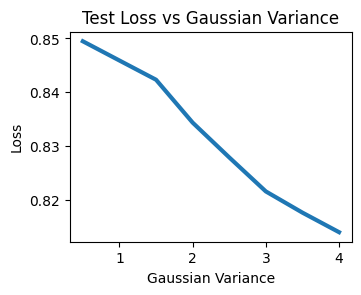

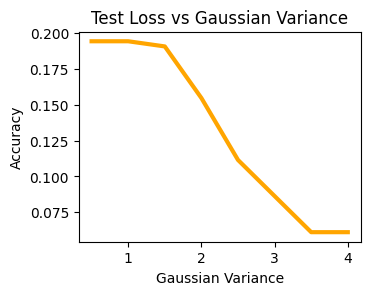

In [ ]:
# Graph for the trend


# plot loss vs Gaussian Variance
plt.figure(figsize=(8,6))
plt.subplot(221)
plt.plot(variances, test_losses, linewidth=3)
plt.title('Test Loss vs Gaussian Variance')
plt.xlabel('Gaussian Variance')
plt.ylabel('Loss')
plt.show()

# plot accuracy vs Gaussian Variance
plt.figure(figsize=(8,6))
plt.subplot(222)
plt.plot(variances, test_accuracy_list, color = "orange", linewidth=3)
plt.title('Test Accuracy vs Gaussian Variance')
plt.xlabel('Gaussian Variance')
plt.ylabel('Accuracy')
plt.show()


# ResNet-50 trained on Augmented data


In [ ]:
# Load ResNet model from json

#Load the Model from Json File
json_file = open('/content/gdrive/My Drive/SML_Project/model_resnet50_augmented.json', 'r')
model_json_c = json_file.read()
json_file.close()
model_r = model_from_json(model_json_c)
#Load the weights
model_r.load_weights("/content/gdrive/My Drive/SML_Project/chest_CT_SCAN-ResNet50_augmented.hdf5")
#Compile the model
opt = SGD(lr=1e-4, momentum=0.9)
model_r.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])

In [ ]:
# testgenerator for images with gaussian noise
image_shape = (460,460,3)
N_CLASSES = 2
BATCH_SIZE = 32

test_datagen = ImageDataGenerator(dtype='float32')
test_losses_r = []
test_accuracy_list_r = []
for i in range(len(variances)):
  test_path = f"gaussianNoise/var/{i}"
  test_generator = test_datagen.flow_from_directory(test_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (460,460),
                                                   class_mode = 'categorical')
  test_loss, test_accuracy = model_r.evaluate(test_generator)
  test_losses_r.append(test_loss)
  test_accuracy_list_r.append(test_accuracy)

Found 278 images belonging to 2 classes.
9/9 [==============================] - 170s 18s/step - loss: 2.1626 - accuracy: 0.1942
Found 278 images belonging to 2 classes.
9/9 [==============================] - 165s 18s/step - loss: 2.1810 - accuracy: 0.1942
Found 278 images belonging to 2 classes.
9/9 [==============================] - 162s 18s/step - loss: 2.2243 - accuracy: 0.1942
Found 278 images belonging to 2 classes.
9/9 [==============================] - 172s 19s/step - loss: 2.2384 - accuracy: 0.1942
Found 278 images belonging to 2 classes.
9/9 [==============================] - 164s 18s/step - loss: 2.2501 - accuracy: 0.1942
Found 278 images belonging to 2 classes.
9/9 [==============================] - 165s 18s/step - loss: 2.2661 - accuracy: 0.1942
Found 278 images belonging to 2 classes.
9/9 [==============================] - 164s 18s/step - loss: 2.2830 - accuracy: 0.1942
Found 278 images belonging to 2 classes.
9/9 [==============================] - 167s 18s/step - loss: 2.

In [ ]:
print(test_losses)
print(variances)

[0.8494674563407898, 0.84590083360672, 0.8423410058021545, 0.8343923091888428, 0.827944815158844, 0.8216426968574524, 0.8177119493484497, 0.8140910863876343, 2.162639856338501, 2.180960178375244, 2.2242977619171143, 2.238356351852417, 2.25014591217041, 2.2660624980926514, 2.282973527908325, 2.284396171569824]
[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]


In [ ]:
# Graph for the trend


# plot loss vs Gaussian Variance
plt.figure(figsize=(8,6))
plt.subplot(221)
plt.plot(variances, test_losses_r, linewidth=3)
plt.title('Test Loss vs Gaussian Variance')
plt.xlabel('Gaussian Variance')
plt.ylabel('Loss')
plt.show()

# plot accuracy vs Gaussian Variance
plt.figure(figsize=(8,6))
plt.subplot(222)
plt.plot(variances, test_accuracy_list_r, color = "orange", linewidth=3)
plt.title('Test Loss vs Gaussian Variance')
plt.xlabel('Gaussian Variance')
plt.ylabel('Accuracy')
plt.show()